In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Read csv
pokemon = pd.read_csv('./data/pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


# Bar chart

<AxesSubplot:xlabel='generation_id', ylabel='count'>

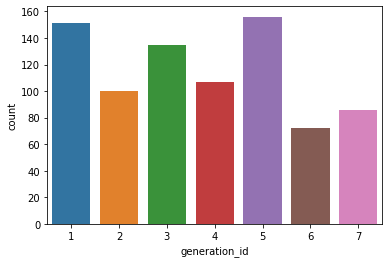

In [5]:
sns.countplot(data=pokemon, x='generation_id')

In [14]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [17]:
base_color=sns.color_palette()[0]

<AxesSubplot:xlabel='generation_id', ylabel='count'>

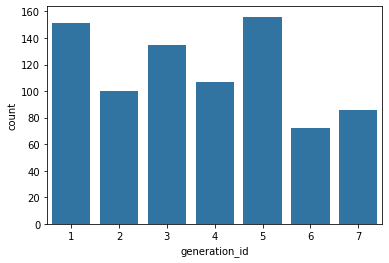

In [19]:
sns.countplot(data=pokemon, x='generation_id', color=base_color)

## Matplotlib style

<BarContainer object of 7 artists>

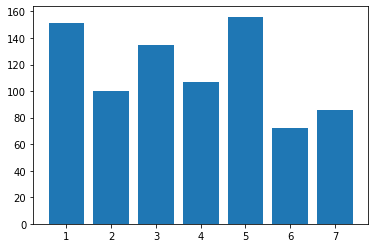

In [56]:
gen_count=pokemon['generation_id'].value_counts(sort=False)
plt.bar(x=gen_count.index,height=gen_count, data=pokemon)

**done matplotlib part**

## more Seaborn examples

<AxesSubplot:xlabel='generation_id', ylabel='count'>

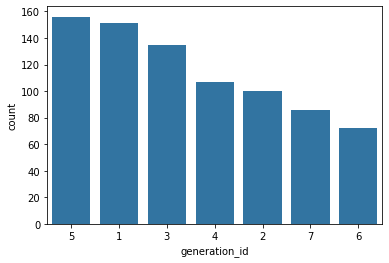

In [61]:
sns.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]) # manual

freq = pokemon['generation_id'].value_counts()
gen_order = freq.index

sns.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order)

### rotate label

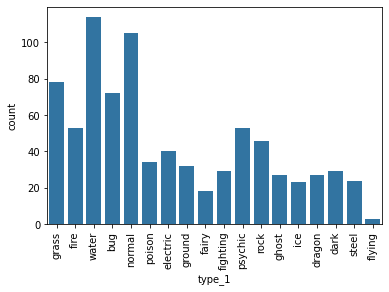

In [67]:
sns.countplot(data=pokemon, x='type_1', color=base_color)
plt.xticks(rotation=90);

### rotate axes

<AxesSubplot:xlabel='count', ylabel='type_1'>

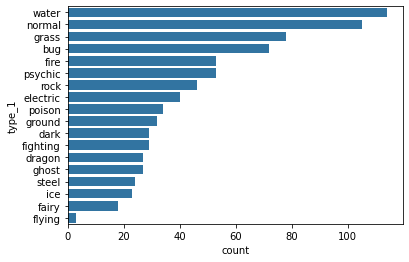

In [68]:
type_order = pokemon['type_1'].value_counts().index
sns.countplot(data=pokemon, y='type_1', color=base_color, order=type_order)

# absolute vs relative

## absolute

In [73]:
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [72]:
pkmn_types = pokemon.melt(id_vars=['id','species'],                     #data wrangling using df.melt()
                         value_vars=['type_1','type_2'],
                         var_name='type_level',
                         value_name='type')
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [76]:
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [78]:
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

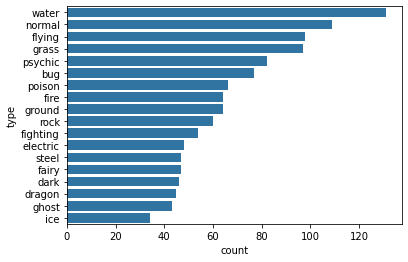

In [81]:
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# relative

In [94]:
n_pokemon = pkmn_types['type'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
max_prop

0.10808580858085809

In [96]:
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [100]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

Text(0.5, 0, 'proportioin')

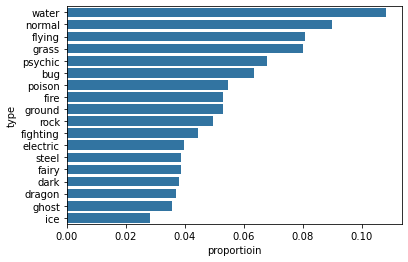

In [103]:
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportioin')

## additional Variation

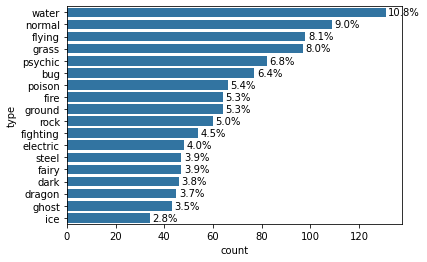

In [120]:
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order)
for i in range (type_counts.shape[0]):
        count = type_counts[i]
        pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
         # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
        plt.text(count+1, i, pct_string, va='center')

## another example        

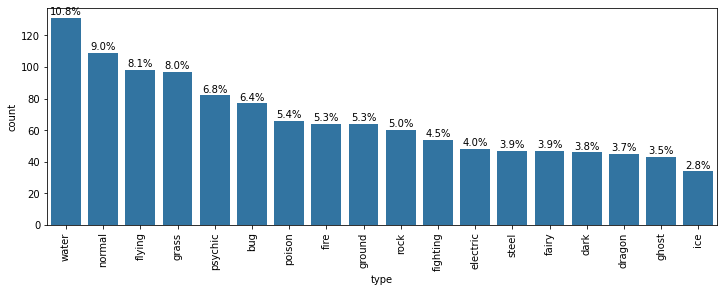

In [148]:
sns.countplot(data=pkmn_types, x='type', color=base_color, order=type_order)

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90)

for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

# Specify the figure size in inches, for both X, and Y axes
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,4
